### E22036-YOGESH SINGH SHAKYA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv("House.csv")

In [5]:
df=df.drop(["sqft_living15","sqft_lot15"],axis = 1)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045


# QUESTIONS

1.Newly built houses and with good condition will have higher price tag.

2.Houses with Views and waterfront will be costly.

3.houses with more sqft living ,bathroom and grade will be costly.

4.newly renovated house will also have decent price.

In [7]:
#no null values
print(pd.isnull(df).sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64


In [8]:
df['price']=df['price'].astype("int64") #converts price into integer


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


In [10]:
    df_nm_features = df.select_dtypes(exclude='object')  #this variable will have all the numerical variable
    df_ct_features = df.select_dtypes(include='object')  #this one will have all the categorical

In [11]:
df_nm_features

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,468000,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,310000,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,400000,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,429000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,3448900210,610685,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,7936000429,1007500,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


In [12]:
df_ct_features

,date
0,20141209T000000
1,20140512T000000
2,20140527T000000
3,20140528T000000
4,20141007T000000
...,...
9756,20150126T000000
9757,20141014T000000
9758,20150326T000000
9759,20140623T000000


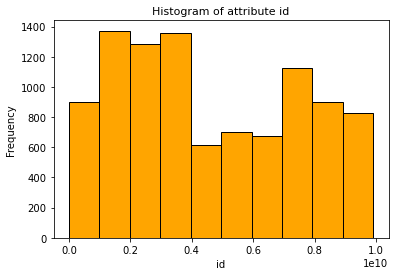

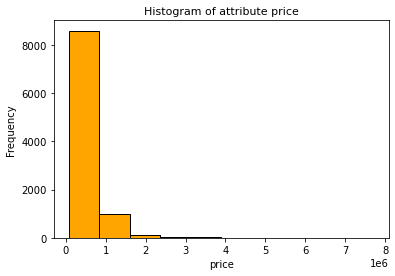

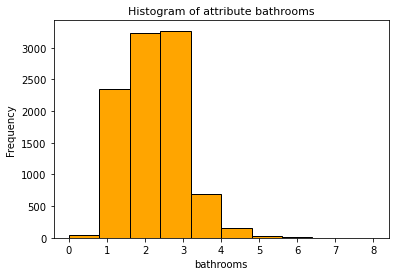

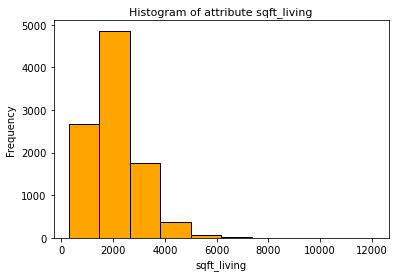

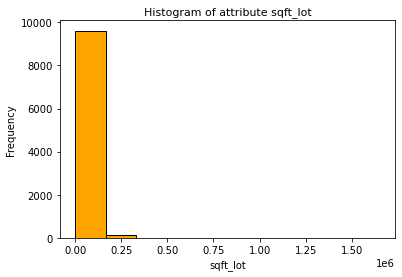

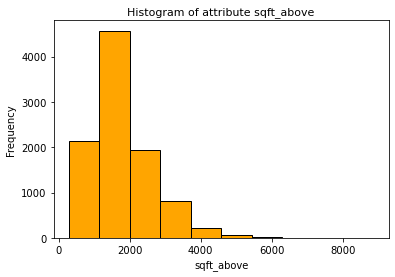

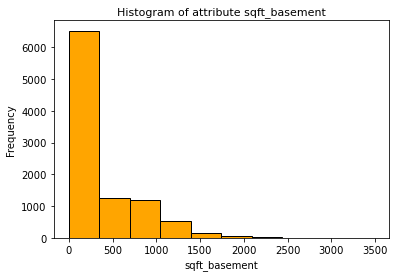

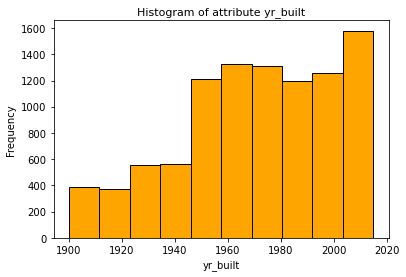

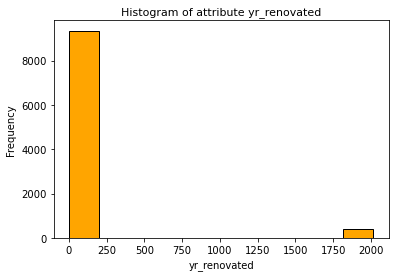

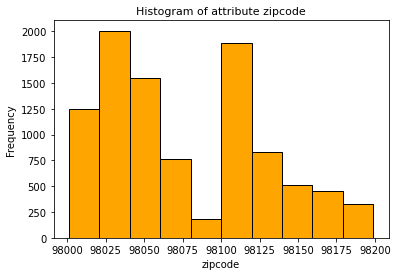

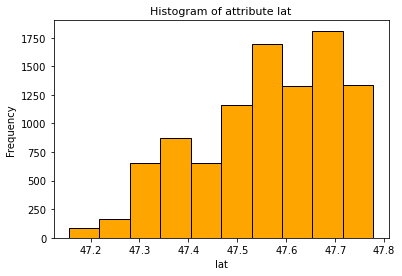

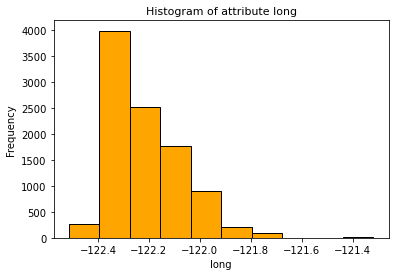

In [13]:
for i in df_nm_features:
    if len(df_nm_features[i].unique())>15:
        
        plt.hist(df_nm_features[i],color="orange",edgecolor="black") #making histogram of blue colour and black edge
        plt.xlabel(i)                         #labelling x axis
        plt.ylabel('Frequency ')
        plt.title('Histogram of attribute '+i,fontsize=11)
        plt.show()

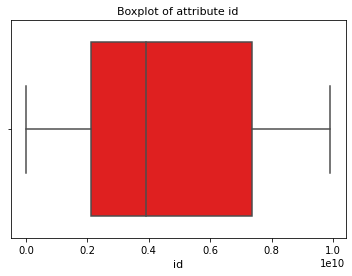

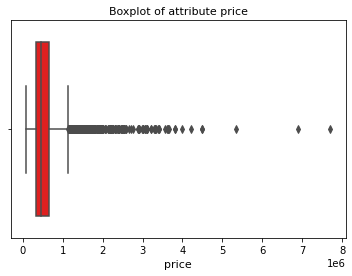

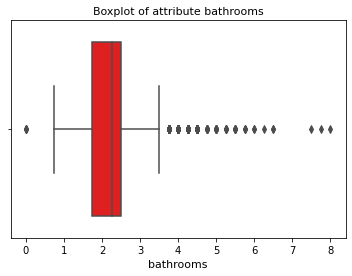

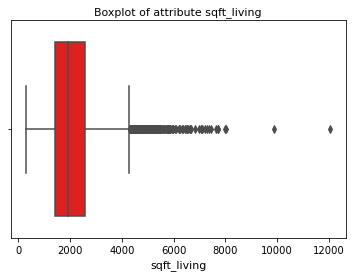

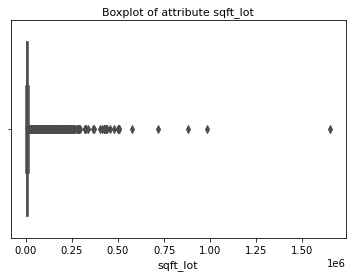

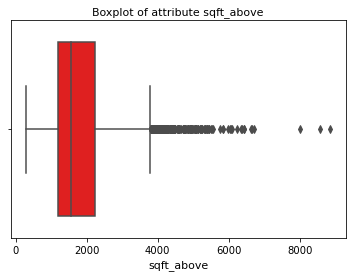

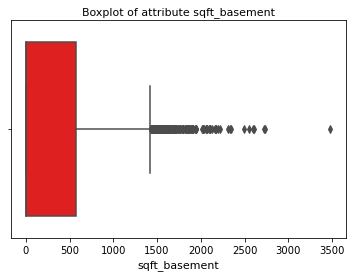

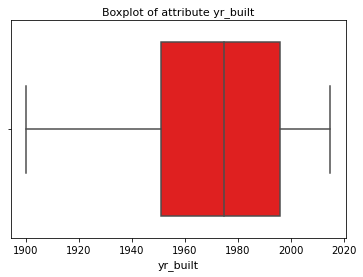

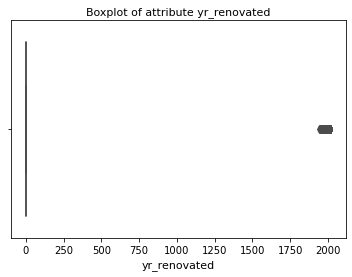

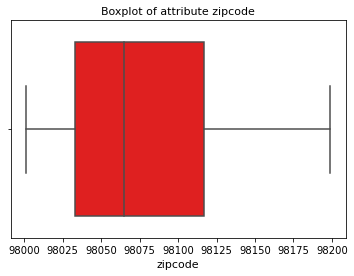

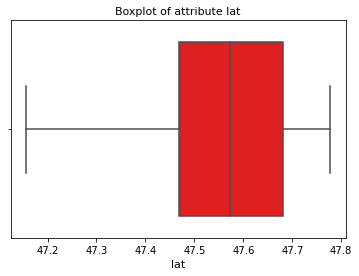

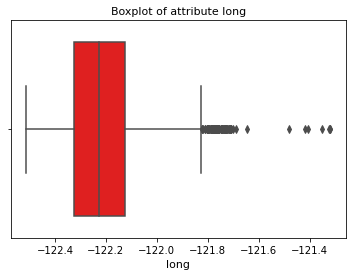

In [14]:
for i in df_nm_features:
    if len(df_nm_features[i].unique())>15:
          
        sns.boxplot(x=df_nm_features[i],color='red') #making boxplot of blue colour
        plt.xlabel(i,fontsize=11)
        plt.title('Boxplot of attribute '+i,fontsize=11) # string concatenation in naming
        plt.show()

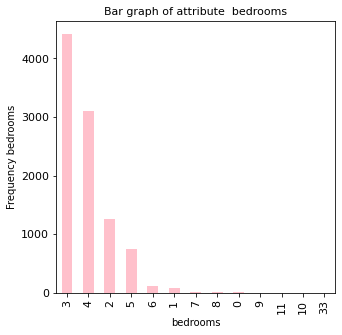

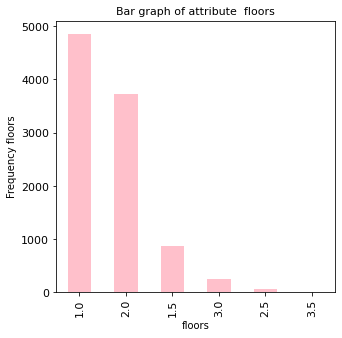

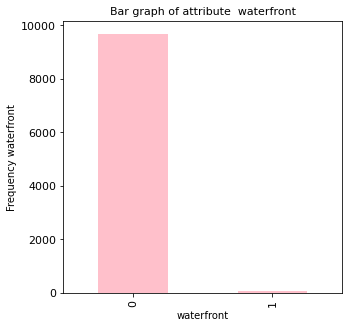

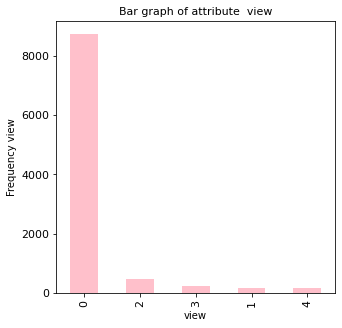

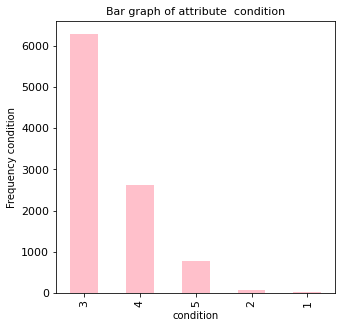

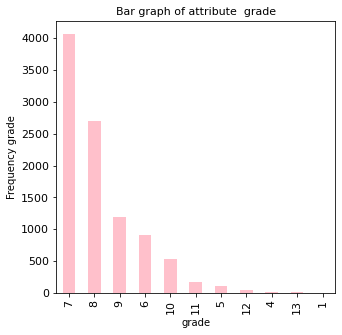

In [15]:
for i in df_nm_features:
        if len(df_nm_features[i].unique())<15:
            df_nm_features[i].value_counts().plot(kind='bar',figsize=(5,5),
                                                       color="pink",fontsize=11)
            plt.xlabel(i)
            plt.ylabel("Frequency"+ " "+ i)
            plt.title('Bar graph of attribute  '+i,fontsize=11)
            plt.show()

1.most house are in decent condition, more than 60% have condition 3 on scle of 5

2.90%house have 0 views.

3.house with waterfront are few.

# Bivariate Analysis

<AxesSubplot:title={'center':'House pricing Heatmap'}>

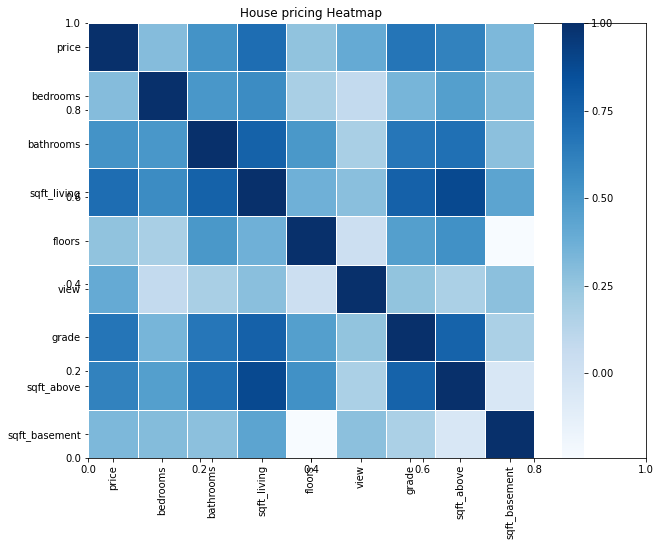

In [16]:
df_num=df[["price","bedrooms","bathrooms","sqft_living","floors","view","grade","sqft_above","sqft_basement"]]
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("House pricing Heatmap")
corr = df_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [17]:
corr=df.corr()
corr.style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514


   We see that sqft living , bathrooms, grade and sqft above have corr>.5 wrt price 
   so we plot scatter plot between them

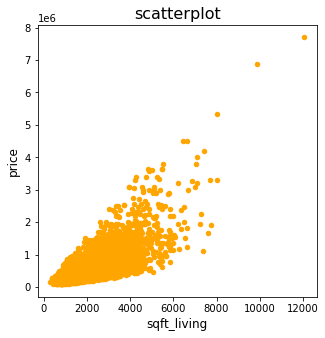

In [18]:
df.plot(kind="scatter",                                    
                        x="sqft_living",y="price",                                 
                        color='orange',                                      
                        figsize=(5,5)) 
plt.ylabel("price", fontsize=12)
plt.xlabel("sqft_living",fontsize =12)
plt.title("scatterplot", fontsize=16)
plt.show()

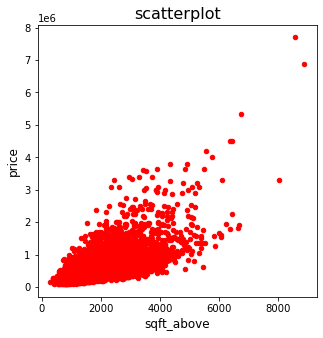

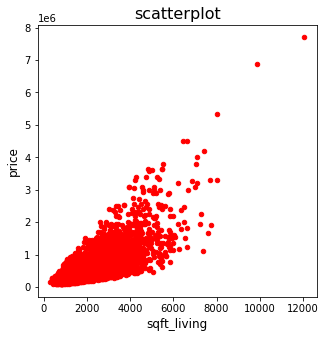

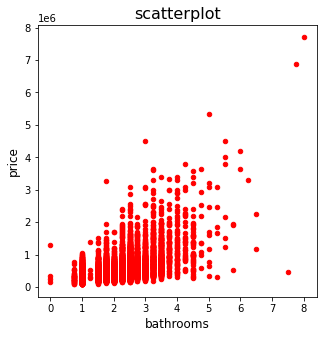

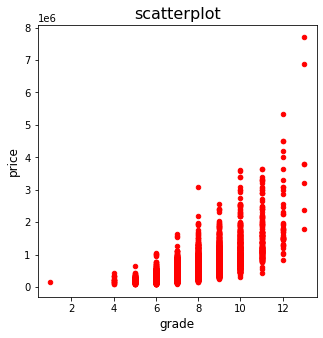

In [19]:
col=["sqft_above","sqft_living","bathrooms","grade"]

for i in col:
    df.plot(kind="scatter",                                    
                        x=i,y="price",                                 
                        color='red',                                      
                        figsize=(5,5)) 
    plt.ylabel("price", fontsize=12)
    plt.xlabel(i,fontsize =12)
    plt.title("scatterplot", fontsize=16)
    plt.show()
    

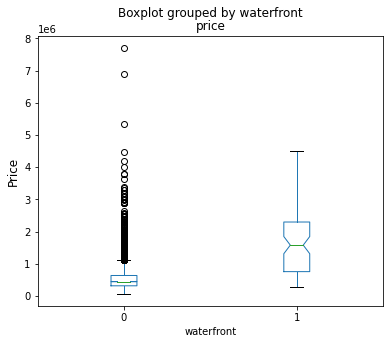

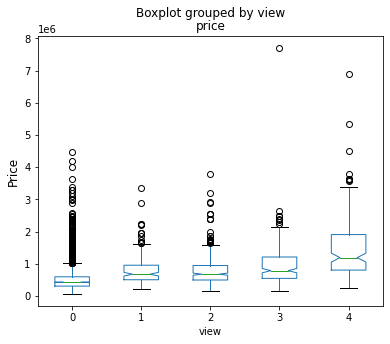

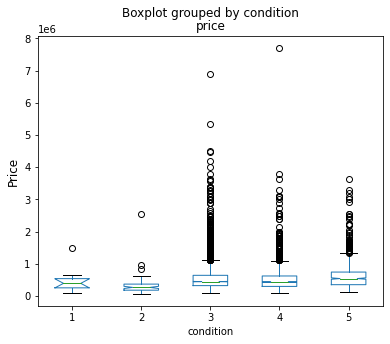

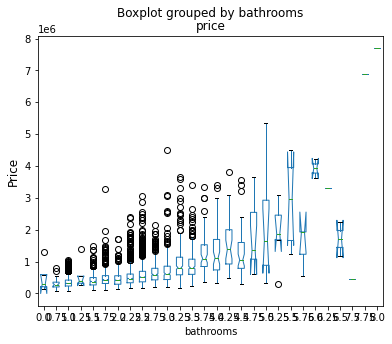

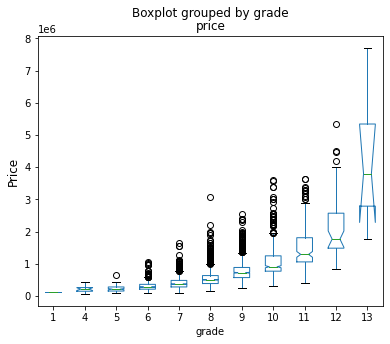

In [20]:
col=["waterfront","view","condition","bathrooms","grade"]     #list of features for plotting boxplots

for i in col:
    df.boxplot(column="price",notch=True,
            by=i,
            grid=False,
            figsize=(6,5))

    plt.ylabel("Price", fontsize=12)


    plt.show()


# 2.

OBS 1:as the sqft living increases , the price of house increses,positive trend

OBS 2: Sqft_above also show positive similar to sqft_living.

OBS 3:as grade of house increse price also increase.

OBS 4: as no of bathrooms increse price increses.

OBS  5: houses with waterfront are costlier than houses without them.

OBS 6 :condition affected the price but not much                                       {SURPRISING}

OBS 7: AGE of house didn't affected price much(done below in CREATING NEW FEATURE .)   {SURPRISING}

lot of outliers in all boxplots, means other features also determine price.


## 3 Decision Tree

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

### First SET of PREDICTORS

Took these FEATURES as they showed a TREND with price

FIRST SET  [["sqft_living","bathrooms","grade"]]

SECOND SET [["sqft_living","bedrooms","bathrooms","view","grade","floors","condition","waterfront"]]

In [22]:
X = df[["sqft_living","bathrooms","grade"]]   
y = df.price

In [23]:
#STANDARDIZATION

In [24]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [25]:
X_scaled                     #scale

,sqft_living,bathrooms,grade
0,-0.136693,1.140701,-0.559360
1,3.595187,3.078858,2.822962
2,-0.999555,-1.443507,-0.559360
3,-0.708339,-1.443507,-0.559360
4,-0.773054,-0.474429,-0.559360
...,...,...,...
9756,-0.643624,-0.151403,0.286220
9757,0.467311,0.494649,1.131801
9758,1.535103,1.786754,1.131801
9759,-1.150556,-1.766533,-0.559360


In [26]:
X_scaled.var()

sqft_living    1.000102
bathrooms      1.000102
grade          1.000102
dtype: float64

In [27]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = .3)

In [28]:
#fitting decision tree
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5) #greedy algorithm
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)

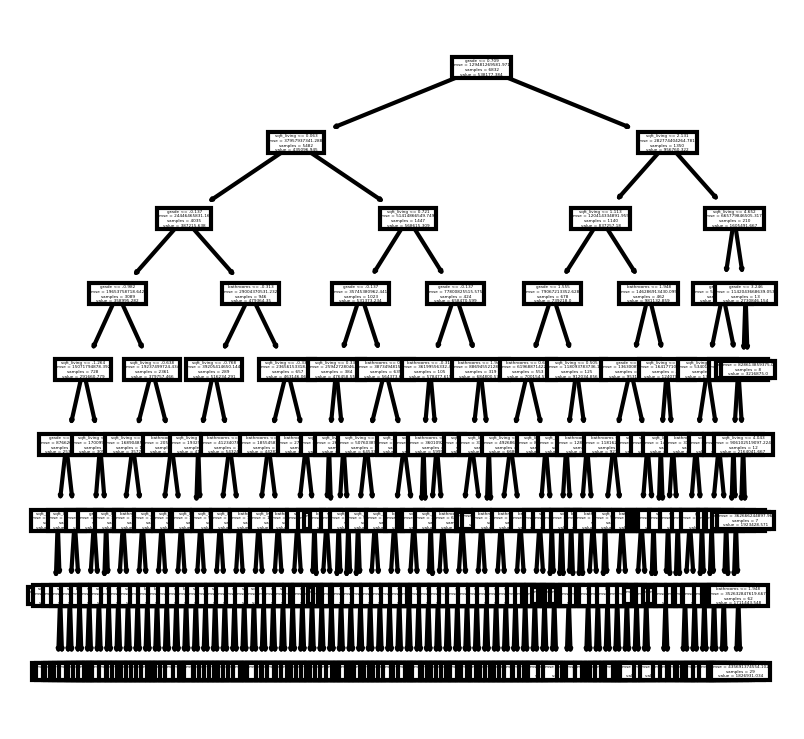

In [29]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [30]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([533407.97660819, 533407.97660819, 482863.08333333, ...,
       497462.49557522, 870835.71428571, 461555.28431373])

In [31]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

272428.4321627901

In [32]:
# MAE
np.mean(np.abs(y_valid - y_pred))

163382.43743914654

In [33]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

32.16243704274884

In [34]:
from sklearn.metrics import r2_score       #r2 score
score=r2_score(y_valid,y_pred)
score 

0.5825618941200315

### ANOTHER SET OF PREDICTORS

SET 1 PREDICTORS GAVE 32% ERROR i.e model didn't perform well with those features.

SET 2 kept the set 1 included in set 2 because togehther with other predictors they might give good results.

In [35]:
X = df[["sqft_living","bedrooms","bathrooms","view","grade","floors","condition","waterfront"]] 
y = df.price

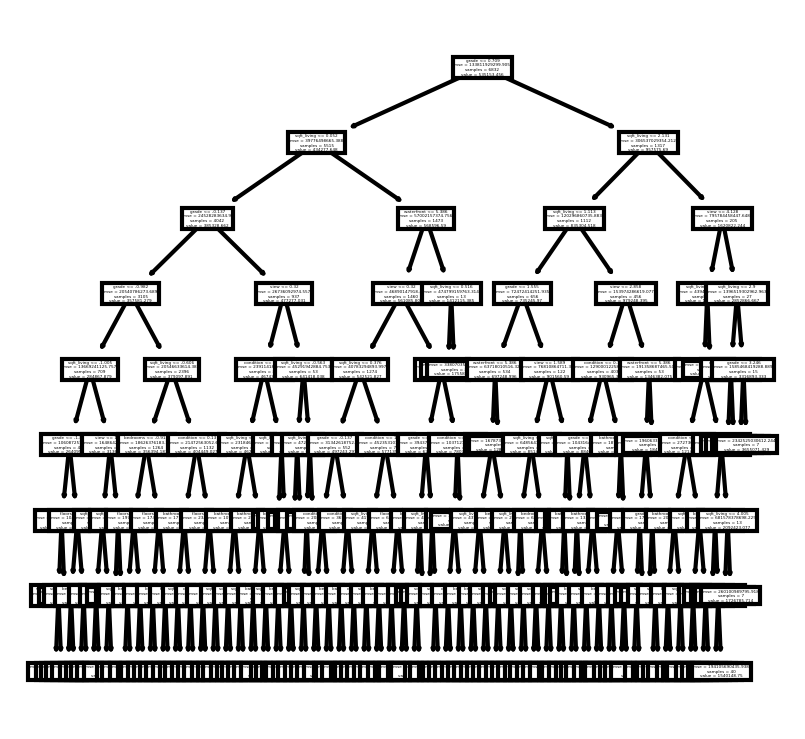

In [36]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = .3)
#fitting decision tree
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5) #greedy algorithm
reg_tree.fit(X_train, y_train)

fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [37]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([718555.89411765, 266693.81569966, 447844.80532787, ...,
       412303.03149606, 391178.87596899, 325949.62109955])

In [38]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.673763969612605

In [39]:
# MAE
np.mean(np.abs(y_valid - y_pred))

148864.90194130133

In [40]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

249837.1072199984

In [41]:
score=r2_score(y_valid,y_pred)
score

0.6271413264382699

Comparision OF SET1 AND SET2


MAPE (Error) reduced from 31 to 28.6 with second set of predictors, which is good.

r2 score incresed from .56 to .62, which means its a better fit.

# 4 feature engineering

#ERROR IS VERY HIGH,so taking log transformation of target -->price

In [42]:
df['log_price'] = np.log(df['price'])  #log transform ation of price

In [43]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,log_price
0,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,13.311329
1,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,14.018451
2,9212900260,20140527T000000,468000,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,13.056224
3,114101516,20140528T000000,310000,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,12.644328
4,6054650070,20141007T000000,400000,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,12.899220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,12.969212
9757,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,13.322337
9758,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,13.822983
9759,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,12.904459


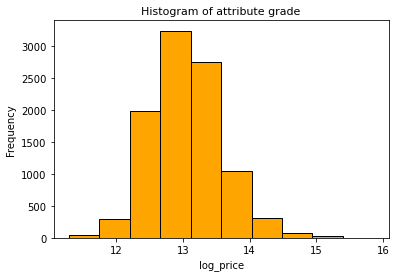

In [44]:
plt.hist(df["log_price"],color="orange",edgecolor="black") 
plt.xlabel("log_price")                         
plt.ylabel('Frequency ')
plt.title('Histogram of attribute '+i,fontsize=11)
plt.show()

 *  now the price becomes more normally distributed

In [45]:
#taking log transform of target
X = df[["sqft_living","bedrooms","bathrooms","view","grade","floors","condition","waterfront"]] 
y = df.log_price

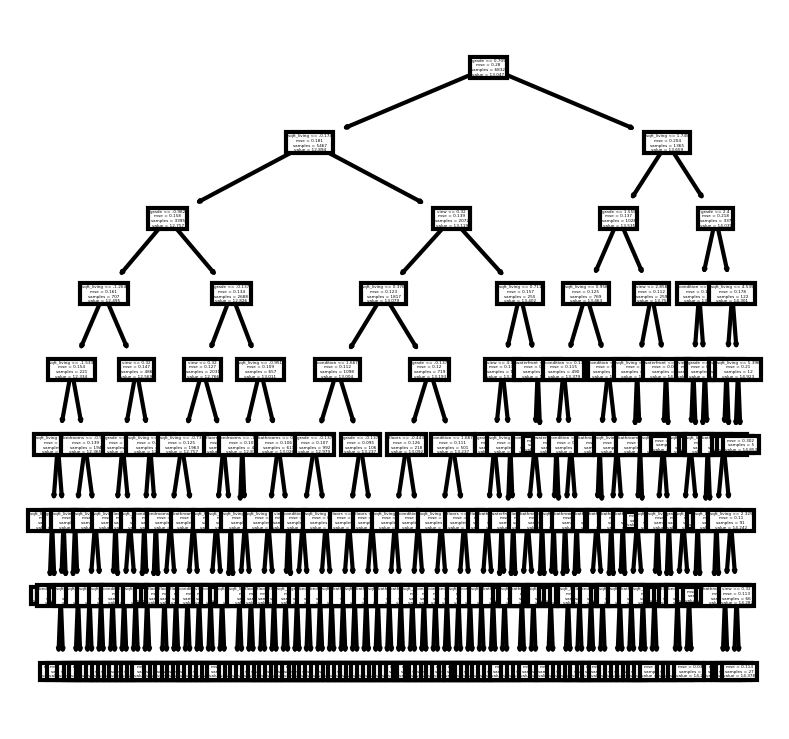

array([13.03415815, 12.7808755 , 12.95885728, ..., 12.61646036,
       12.80396359, 13.82680802])

In [46]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))    #standardization
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = .3)


#fitting decision tree
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5) #greedy algorithm
reg_tree.fit(X_train, y_train)


fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

y_pred = reg_tree.predict(X_valid)
y_pred

In [48]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

2.1063079184352556

In [49]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

0.3432388791873972

In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_valid,y_pred)
score        

0.5937394646508962

In [51]:
#MAPE after taking antilog of y_valid and Y_pred
np.mean(np.abs(np.exp(y_valid)-np.exp(y_pred))/np.exp(y_valid))*100

28.665937385783447

ERROR REDUCED BUT NOT MUCH SO CREATING NEW FEATURE AGE

### CREATING NEW FEATURE

In [53]:
#AGE OF HOUSE

In [54]:
df.date=pd.to_datetime(df["date"])


In [55]:
df['year'] = pd. DatetimeIndex(df['date']). year
df['Age']= df['year']-df['yr_built']

In [58]:
df.Age.describe()


count    9761.000000
mean       43.516750
std        29.239324
min        -1.000000
25%        18.000000
50%        40.000000
75%        63.000000
max       115.000000
Name: Age, dtype: float64

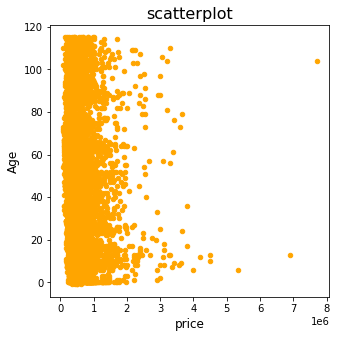

In [59]:
df.plot(kind="scatter",                           #making scatter plot of age and price to see their relation 
                        x="price",y="Age",                                 
                        color='orange',                                      
                        figsize=(5,5)) 
plt.ylabel("Age", fontsize=12)
plt.xlabel("price",fontsize =12)
plt.title("scatterplot", fontsize=16)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


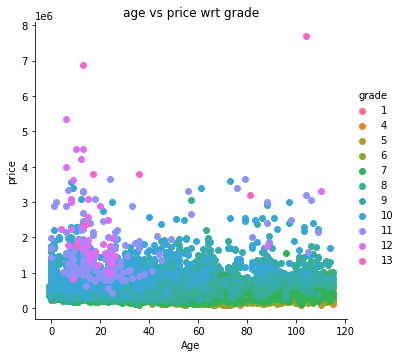

In [60]:
import seaborn as sns            #plotting trivariate scatter plot of price , age and grade  as bivariate plot didn't show any pattern
(sns
 .FacetGrid(df, hue='grade', size=5)
 .map(plt.scatter, 'Age', 'price')
 .add_legend()
 .set(
    title='age vs price wrt grade',
    xlabel='Age',
    ylabel='price'
 ));

higher grade house are built within 30 years

intial thought that age will affect price but after bivariate scatter plot was inconclusive

but trivariate shows that with grade and age ,there seems a  relation.

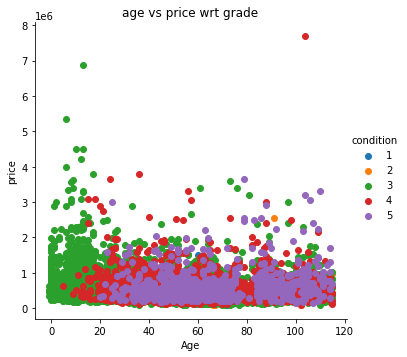

In [61]:
import seaborn as sns        #plotting trivariate scatter plot of price , age and condition  as bivariate plot didn't show any pattern
(sns
 .FacetGrid(df, hue='condition', size=5)
 .map(plt.scatter, 'Age', 'price')
 .add_legend()
 .set(
    title='age vs price wrt grade',
    xlabel='Age',
    ylabel='price'
 ));

new houses seem to have mediocre condition 

houses older than 20 are kept in good condition



In [62]:
#changing yr_renovated in boolean.
df['renovation']=df["yr_renovated"].apply(lambda x:1 if x>0 else 0)

In [63]:
#converting  some predictors to exponential then seeing the difference (as their values were small)
def expn (l):
    for i in l:
        df["exp_"+i]=np.exp(df[i])

In [64]:
l=["bathrooms","grade"]           #exponential transformation of bathrooms and grade
expn(l)

In [65]:
df['bedrooms_exponential']=np.exp(df.bedrooms)  #exponential transform of bedrooms  
df['sqft_living_log']=np.log(df['sqft_living'])  #log transform of sqft_living


In [66]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,log_price,year,Age,renovation,exp_bathrooms,exp_grade,bedrooms_exponential,sqft_living_log
0,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,13.311329,2014,49,0,20.085537,1096.633158,54.598150,7.580700
1,7237550310,2014-05-12,1225000,4,4.50,5420,101930,1.0,0,0,...,47.6561,-122.005,14.018451,2014,13,0,90.017131,59874.141715,54.598150,8.597851
2,9212900260,2014-05-27,468000,2,1.00,1160,6000,1.0,0,0,...,47.6900,-122.292,13.056224,2014,72,0,2.718282,1096.633158,7.389056,7.056175
3,114101516,2014-05-28,310000,3,1.00,1430,19901,1.5,0,0,...,47.7558,-122.229,12.644328,2014,87,0,2.718282,1096.633158,20.085537,7.265430
4,6054650070,2014-10-07,400000,3,1.75,1370,9680,1.0,0,0,...,47.6127,-122.045,12.899220,2014,37,0,5.754603,1096.633158,20.085537,7.222566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,2015-01-26,429000,3,2.00,1490,1126,3.0,0,0,...,47.5699,-122.288,12.969212,2015,1,0,7.389056,2980.957987,20.085537,7.306531
9757,3448900210,2014-10-14,610685,4,2.50,2520,6023,2.0,0,0,...,47.5137,-122.167,13.322337,2014,0,0,12.182494,8103.083928,54.598150,7.832014
9758,7936000429,2015-03-26,1007500,4,3.50,3510,7200,2.0,0,0,...,47.5537,-122.398,13.822983,2015,6,0,33.115452,8103.083928,54.598150,8.163371
9759,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,47.5944,-122.299,12.904459,2014,5,0,2.117000,1096.633158,7.389056,6.927558


featured engg

1.log transform of price as it was rightly skewed intially,after transformation it was normally distributed

2.Yr_renovated converted into boolean 0and 1

3.created new feature AGE, did its analysis with price(above)

4.Exponential transformation of bedroom and bathroom.

5.log transform of sqft_living

# 5)	Model fitting step 2 

In [67]:
#Using the transformed features and new features created 
X = df[['sqft_living_log',"exp_bathrooms","exp_grade","waterfront","view","Age",'renovation','bedrooms_exponential']]
y = df.log_price

In [68]:
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))


#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = .3)

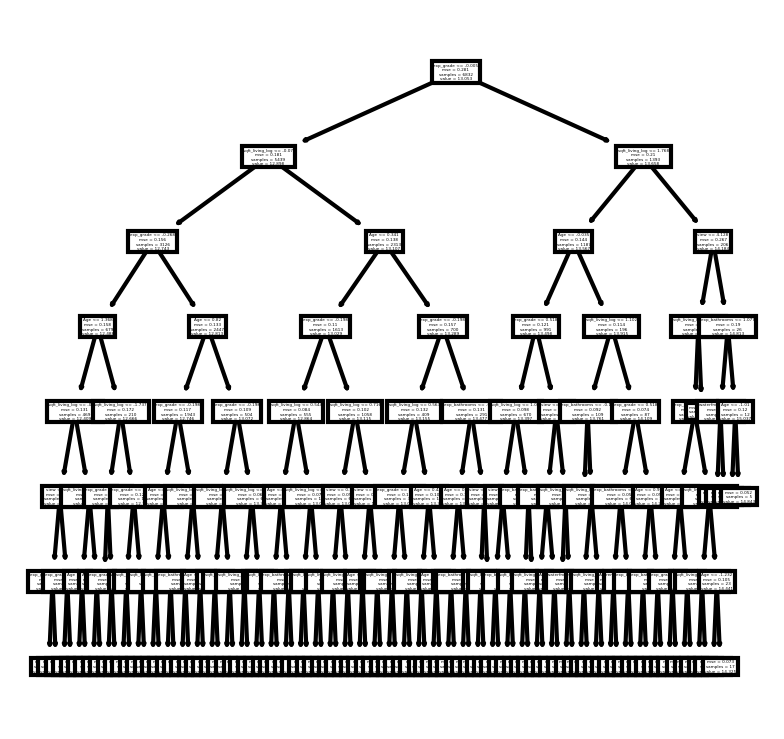

array([13.30886852, 12.98633043, 12.88747605, ..., 13.30886852,
       13.2258154 , 12.81339792])

In [69]:
#fitting decision tree
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5) #greedy algorithm
reg_tree.fit(X_train, y_train)


fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

y_pred = reg_tree.predict(X_valid)
y_pred

In [70]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

1.9606287474332382

In [71]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

0.32392819293596997

In [72]:
#MAPE after taking antilog of y_valid and Y_pred
np.mean(np.abs(np.exp(y_valid)-np.exp(y_pred))/np.exp(y_valid))*100

26.43329644510754

Error reduced from 28.6 to 26.4 after feature engineering

### Hyperparameter Tuning - Choosing Best Depth

In [73]:
# Hyperparameter Tuning - Choosing Best Depth
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid - y_pred))) #MAD

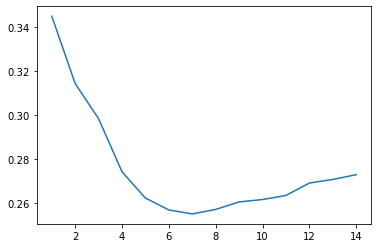

In [74]:
plt.plot(depth, np.array(mae))
plt.show()

k=7

# 6)	Model testing 

In [75]:
df11 = pd.read_csv("house_test.csv")

DOING ALL THE CHANGES ON THE TEST DATASET AND APPLYING THE BEST DECISION TREE REGRESSOR WITH BEST DEPTH=7

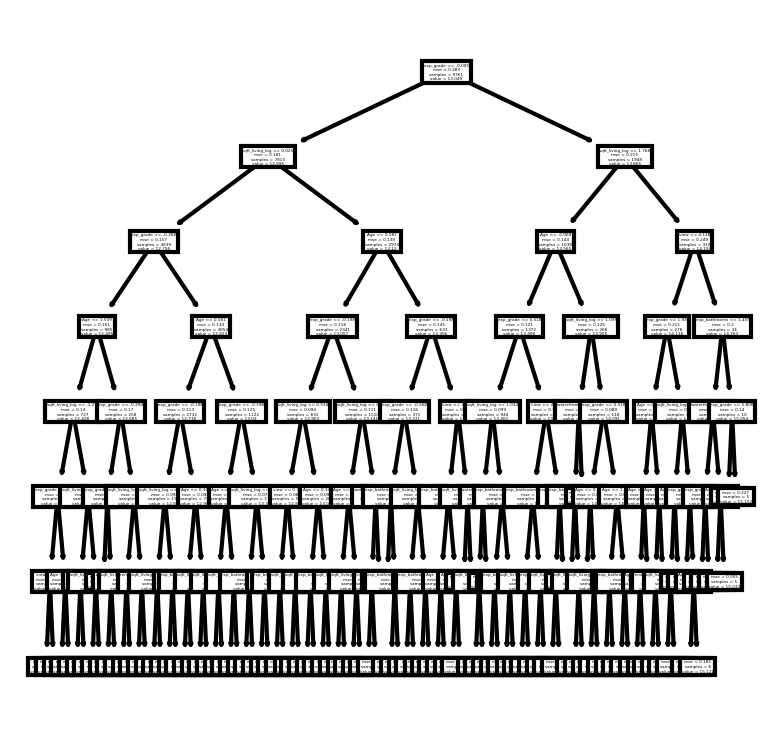

24.722427648202306


In [76]:
df11=df11.drop(["sqft_living15","sqft_lot15"],axis = 1)
df11

df11['log_price'] = np.log(df11['price'])

df11['price_per_sqft']=df11['price']/df11['sqft_lot']

df11.date=pd.to_datetime(df11["date"])

df11['year'] = pd. DatetimeIndex(df11['date']). year
df11['Age']= df11['year']-df11['yr_built']

#changing yr_renovated in boolean.
df11['renovation']=df11["yr_renovated"].apply(lambda x:1 if x>0 else 0)

#converting predictors to exponential then seeing the difference
def expn (l):
    for i in l:
        df11["exp_"+i]=np.exp(df11[i])

l=["bathrooms","grade"]
expn(l)

df11['bedrooms_exponential']=np.exp(df11.bedrooms)
df11['sqft_living_log']=np.log(df11['sqft_living'])



X_test = df[['sqft_living_log',"exp_bathrooms","exp_grade","waterfront","view","Age",'renovation','bedrooms_exponential']]
y_test = df.log_price

X_scaled1 = X_test.apply(lambda x: (x - np.mean(x)) / np.std(x))

reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5) #greedy algorithm
reg_tree.fit(X_scaled, y)


fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

y_pred1 = reg_tree.predict(X_scaled1)
y_pred1

#MAPE after taking antilog of y_valid and Y_pred
print(np.mean(np.abs(np.exp(y_test)-np.exp(y_pred1))/np.exp(y_test))*100)

FINAL ERROR =24.72

ACCURACY=75.28



RESULTS:
    
INITAL ERROR FROM THE SET 1 WAS 32%, CAME DOWN TILL 26.4 AFTER HYPERPARAMETER TUNING.

AFTER APPLYING THE BEST DEPTH WITH BEST FEATURES THE TEST DATA GAVE ERROR 24.72%